# Linear Regression

Alfredo Lozano
148858

In this document I'll illustrate how to a fit linear regression model with the database 'reglin.csv' and the resulting mean squared error, and next I'll repeat those steps for databases : 'reglin2.csv', 'reglin3.csv' and 'reglin4.csv'

In [104]:
import random
import numpy as np
import pandas as pd
from __future__ import division

linear_DB = pd.read_csv("linear_reg/reglin.csv")
linear_DB

%matplotlib inline  

# Model ingredients

In [105]:
import random as rnd

rnd.seed(83117)

linear_DB = linear_DB.sample(frac=1)
size = int(len(linear_DB) * .75)
train = linear_DB[0:size]
test = linear_DB[size:len(linear_DB)]

In [106]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(train[train.columns[0:-1]], train['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
print clf.coef_, clf.intercept_

[ 0.60544582] 2.66736904107


# Plots

In [108]:
import matplotlib.pyplot as plt

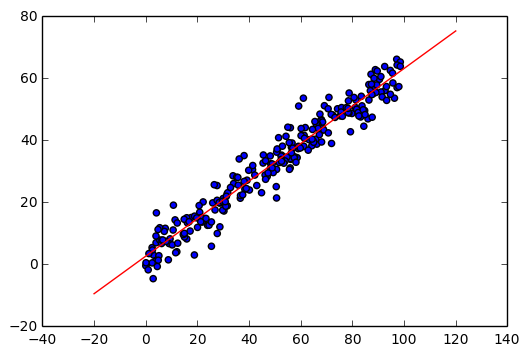

In [109]:
plt.scatter(test['X'],test['y'])
x = np.linspace(-20,120,1000)
y = clf.intercept_ + clf.coef_ * (x)
plt.plot(x,y, 'r')

# Error Analysis

In [110]:
predicted = clf.predict(test[test.columns[0:-1]])
wo_s = np.linspace(clf.coef_ - 10 , clf.coef_ + 10, 100)


In [111]:
mse = []
for wo in wo_s: 
    mse += [np.mean((test['y'] - (wo + clf.coef_ * (test['X'])))**2)]


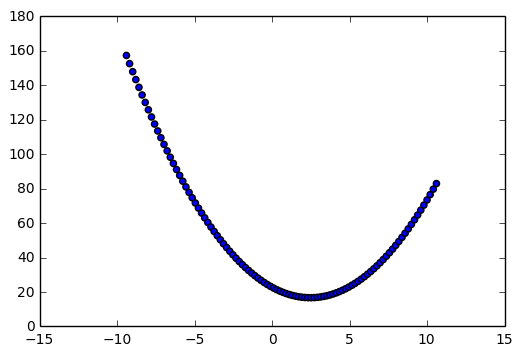

In [112]:
plt.scatter(wo_s,mse)

# Para las otras bases

In [113]:
linear2_DB = pd.read_csv("linear_reg/reglin2.csv")
linear3_DB = pd.read_csv("linear_reg/reglin3.csv")
linear4_DB = pd.read_csv("linear_reg/reglin4.csv")

# LinReg2

[ 60.79684376] -951.850016183


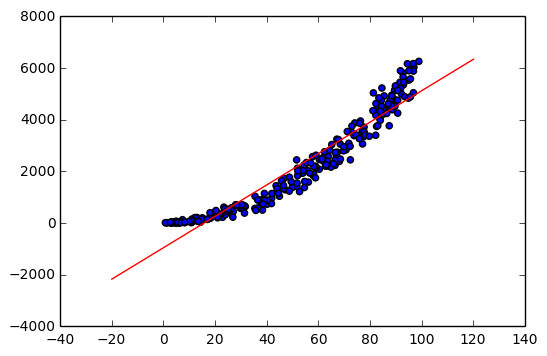

In [114]:
linear2_DB = linear2_DB.sample(frac=1)
size = int(len(linear2_DB) * .75)
train = linear2_DB[0:size]
test = linear2_DB[size:len(linear2_DB)]
clf.fit(train[train.columns[0:-1]], train['y'])
print clf.coef_, clf.intercept_
plt.scatter(test['X'],test['y'])
x = np.linspace(-20,120,1000)
y = clf.intercept_ + clf.coef_ * (x)
plt.plot(x,y, 'r')
predicted = clf.predict(test[test.columns[0:-1]])
wo_s = np.linspace(clf.coef_ - 2000 , clf.coef_ + 1000, 1000)
mse = []
for wo in wo_s: 
    mse += [np.mean((test['y'] - (wo + clf.coef_ * (test['X'])))**2)]

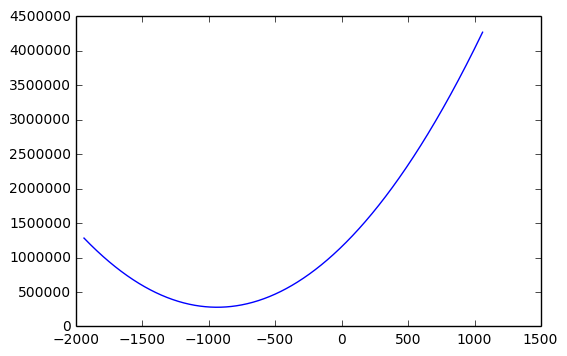

In [115]:
plt.plot(wo_s,mse)

# LinReg3

[-0.00171143] 0.057427501193


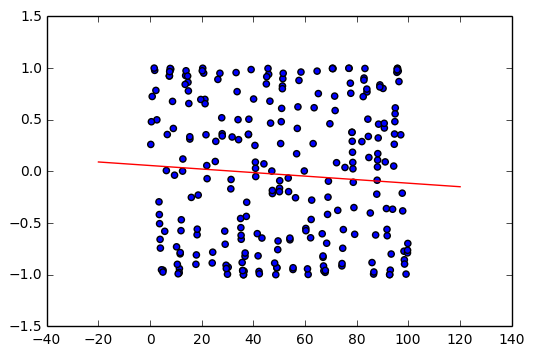

In [116]:
linear3_DB = linear3_DB.sample(frac=1)
size = int(len(linear3_DB) * .75)
train = linear3_DB[0:size]
test = linear3_DB[size:len(linear3_DB)]
clf.fit(train[train.columns[0:-1]], train['y'])
print clf.coef_, clf.intercept_
plt.scatter(test['X'],test['y'])
x = np.linspace(-20,120,1000)
y = clf.intercept_ + clf.coef_ * (x)
plt.plot(x,y, 'r')
predicted = clf.predict(test[test.columns[0:-1]])
wo_s = np.linspace(clf.coef_ - 50 , clf.coef_ + 50, 100)
mse = []
for wo in wo_s: 
    mse += [np.mean((test['y'] - (wo + clf.coef_ * (test['X'])))**2)]

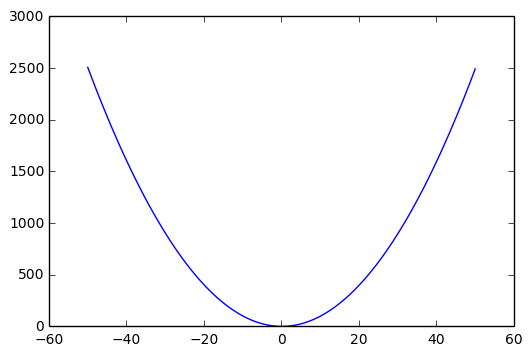

In [117]:
plt.plot(wo_s,mse)

# LinReg4

[-0.01276204] 0.947601773255


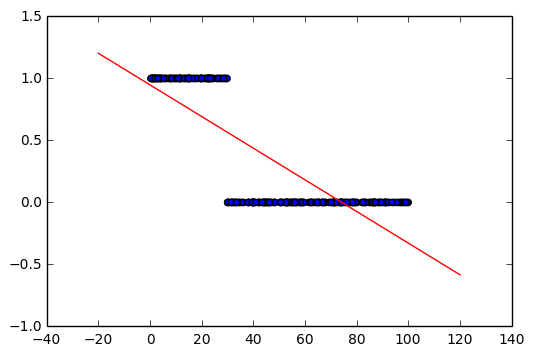

In [118]:
linear4_DB = linear4_DB.sample(frac=1)
size = int(len(linear4_DB) * .75)
train = linear4_DB[0:size]
test = linear4_DB[size:len(linear4_DB)]
clf.fit(train[train.columns[0:-1]], train['y'])
print clf.coef_, clf.intercept_
plt.scatter(test['X'],test['y'])
x = np.linspace(-20,120,1000)
y = clf.intercept_ + clf.coef_ * (x)
plt.plot(x,y, 'r')
predicted = clf.predict(test[test.columns[0:-1]])
wo_s = np.linspace(clf.coef_ - 10 , clf.coef_ + 10, 100)
mse = []
for wo in wo_s: 
    mse += [np.mean((test['y'] - (wo + clf.coef_ * (test['X'])))**2)]

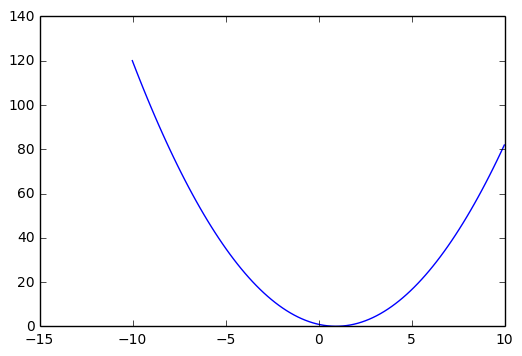

In [120]:
plt.plot(wo_s,mse)

# Iterative Least Mean Squares

In [197]:
linear_DB = linear_DB.sample(frac=1)
size = int(len(linear_DB) * .75)
train = linear_DB[0:size]
test = linear_DB[size:len(linear_DB)]



SyntaxError: invalid syntax (<ipython-input-197-92e4c5b72761>, line 6)

In [208]:
def iterativeLeastMeanSquares(x, y, eta): 
    # x must be a pandas data frame
    
    x = (x - np.mean(x)) / np.std(x)
    
    x_0 = 1
    w_0 = 1
    
    w_s = np.ones(1)
    
    for i in range(len(x)):
        x_i = x.iloc[i]
        y_i = y.iloc[i]
        
        V_x = sum(w_s * x_i) + w_0
        
        w_0 = w_0 + eta * (y_i - V_x)
        w_s = w_s + (eta * (y_i - V_x)) * x_i
        
        # import pdb; pdb.set_trace()
        
    return  [w_0, w_s[0]]


In [209]:
IMS_clf = iterativeLeastMeanSquares(linear_DB['X'], linear_DB['y'], 0.1)
print IMS_clf

[33.569923683332448, 15.978881508184106]


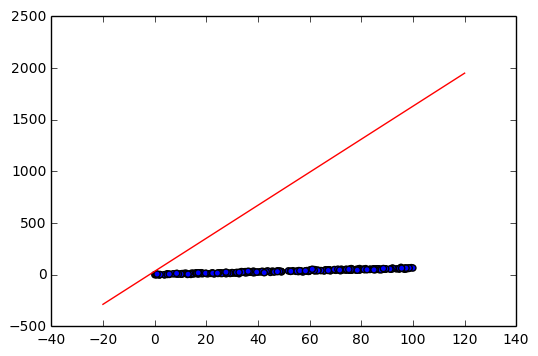

In [210]:
plt.scatter(test['X'],test['y'])
x = np.linspace(-20,120,1000)
y = IMS_clf[0] + IMS_clf[1] * x
plt.plot(x,y, 'r')

